In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Configure Seaborn style
sns.set(style='whitegrid', context='talk', rc={'figure.dpi': 100})
palette = sns.color_palette("tab10")

In [2]:
# Load dataset
df = pd.read_csv('data/predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
# Removing all contradictions
target_contradiction_count = df[
    ((df['Target'] == 1) & (df['Failure Type'] == 'No Failure')) |
    ((df['Target'] == 0) & (df['Failure Type'] != 'No Failure'))
].shape[0]

print(f"Contradictions between 'Target' and 'Failure Type': {target_contradiction_count} rows.")

mask = ((df['Target'] == 1) & (df['Failure Type'] == 'No Failure')) | \
                     ((df['Target'] == 0) & (df['Failure Type'] != 'No Failure'))

# Use .loc with the inverted mask '~' to select the rows to keep
df = df.loc[~mask].copy()

target_contradiction_count = df[
    ((df['Target'] == 1) & (df['Failure Type'] == 'No Failure')) |
    ((df['Target'] == 0) & (df['Failure Type'] != 'No Failure'))
].shape[0]

print(f"Contradictions between 'Target' and 'Failure Type': {target_contradiction_count} rows.")


Contradictions between 'Target' and 'Failure Type': 0 rows.
Contradictions between 'Target' and 'Failure Type': 0 rows.


In [4]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      9973 non-null   int64  
 1   Product ID               9973 non-null   object 
 2   Type                     9973 non-null   object 
 3   Air temperature [K]      9973 non-null   float64
 4   Process temperature [K]  9973 non-null   float64
 5   Rotational speed [rpm]   9973 non-null   int64  
 6   Torque [Nm]              9973 non-null   float64
 7   Tool wear [min]          9973 non-null   int64  
 8   Target                   9973 non-null   int64  
 9   Failure Type             9973 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 857.1+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,9973.0,NaN,NaN,NaN,5000.770881,2888.466894,1.0,2499.0,4998.0,7504.0,10000.0
Product ID,9973,9973,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,9973,3,L,5984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],9973.0,NaN,NaN,NaN,300.003259,2.000548,295.3,298.3,300.1,301.5,304.5
Process temperature [K],9973.0,NaN,NaN,NaN,310.004031,1.483692,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],9973.0,NaN,NaN,NaN,1538.893212,179.412171,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],9973.0,NaN,NaN,NaN,39.978993,9.966805,3.8,33.2,40.1,46.7,76.6
Tool wear [min],9973.0,NaN,NaN,NaN,107.921087,63.649152,0.0,53.0,108.0,162.0,253.0
Target,9973.0,NaN,NaN,NaN,0.033089,0.178879,0.0,0.0,0.0,0.0,1.0
Failure Type,9973,5,No Failure,9643,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Stage 1 target distribution:")
print(df['Target'].value_counts(normalize=True))
print("\nFailure Type distribution (only where Target==1):")
print(df.loc[df['Target']==1, 'Failure Type'].value_counts(normalize=True))


Stage 1 target distribution:
Target
0    0.966911
1    0.033089
Name: proportion, dtype: float64

Failure Type distribution (only where Target==1):
Failure Type
Heat Dissipation Failure    0.339394
Power Failure               0.287879
Overstrain Failure          0.236364
Tool Wear Failure           0.136364
Name: proportion, dtype: float64


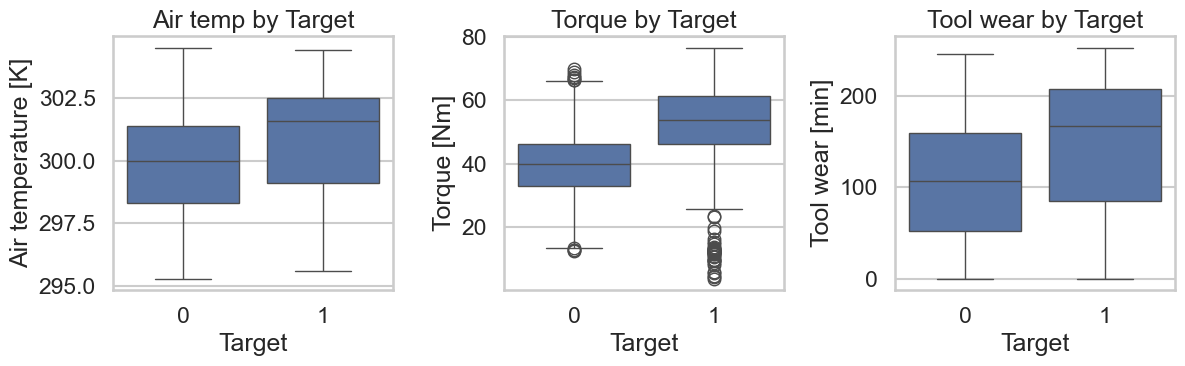

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x='Target', y='Air temperature [K]', data=df)
plt.title('Air temp by Target')
plt.subplot(1,3,2)
sns.boxplot(x='Target', y='Torque [Nm]', data=df)
plt.title('Torque by Target')
plt.subplot(1,3,3)
sns.boxplot(x='Target', y='Tool wear [min]', data=df)
plt.title('Tool wear by Target')
plt.tight_layout()

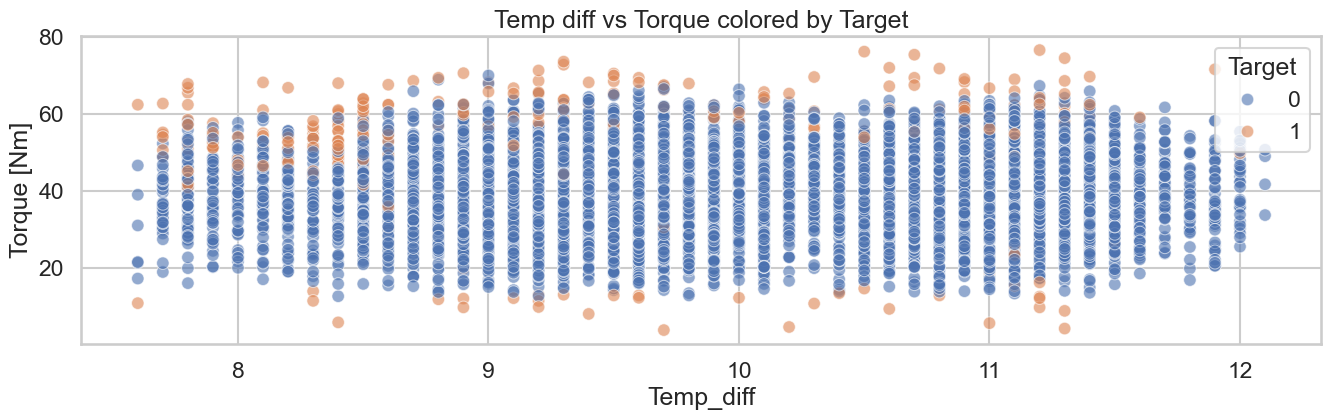

In [17]:
df['Temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
plt.figure(figsize=(16,4))
sns.scatterplot(x='Temp_diff', y='Torque [Nm]', hue='Target', data=df, alpha=0.6)
plt.title('Temp diff vs Torque colored by Target')
plt.show()

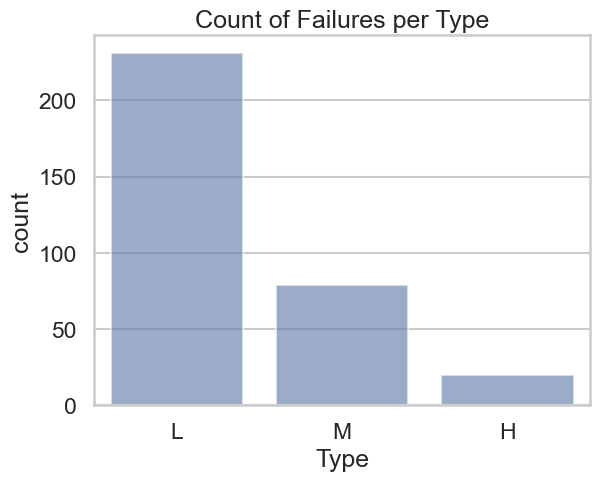

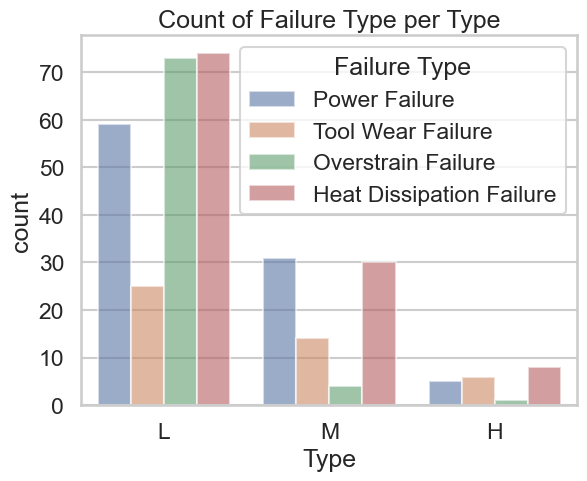

In [9]:
df2 = df[df['Target']==1]
sns.countplot(x='Type', data=df2, alpha=0.6)
plt.title('Count of Failures per Type')
plt.show()

sns.countplot(x='Type', hue='Failure Type', data=df2, alpha=0.6)
plt.title('Count of Failure Type per Type')
plt.show()


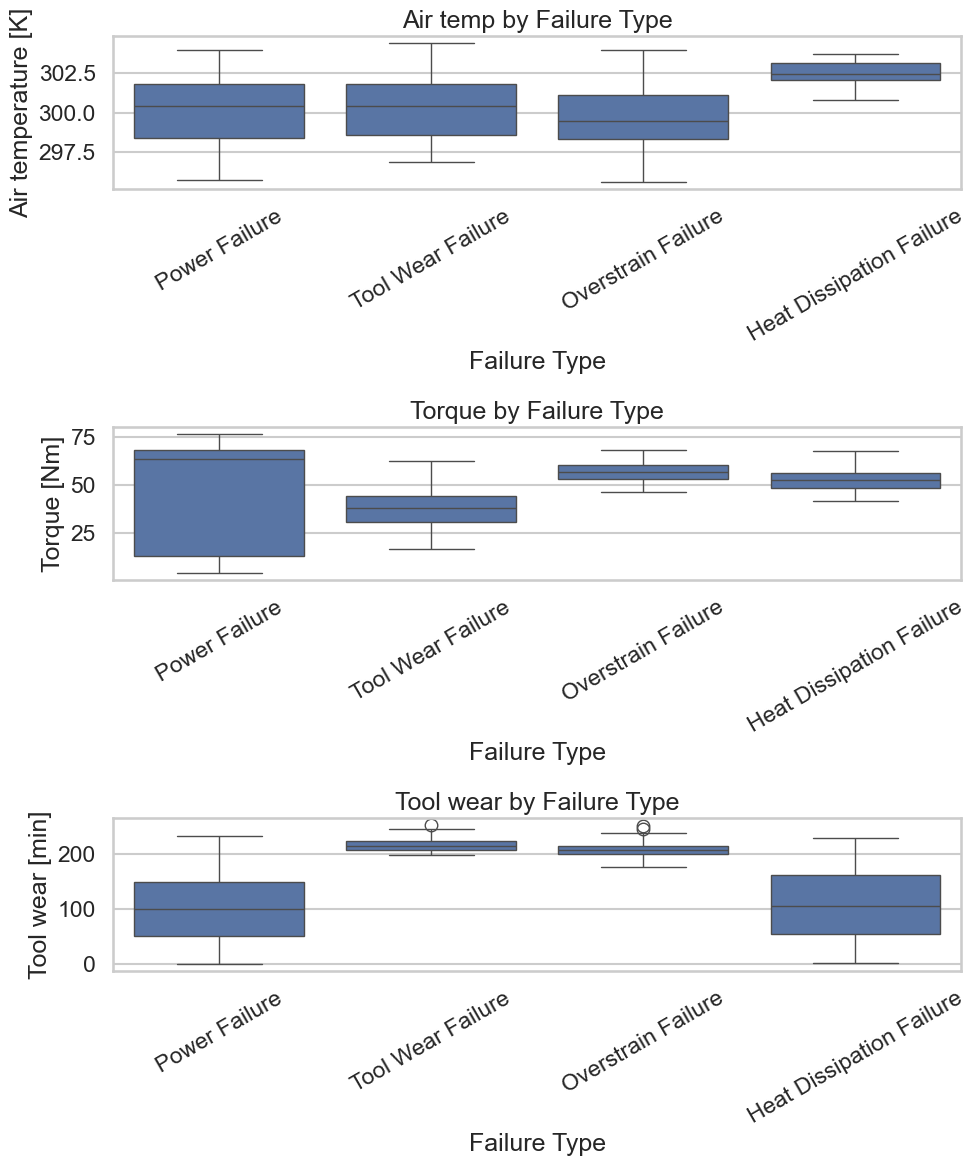

In [20]:
plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
sns.boxplot(x='Failure Type', y='Air temperature [K]', data=df2)
plt.title('Air temp by Failure Type')
plt.xticks(rotation=30)

plt.subplot(3, 1, 2)
sns.boxplot(x='Failure Type', y='Torque [Nm]', data=df2)
plt.title('Torque by Failure Type')
plt.xticks(rotation=30)

plt.subplot(3, 1, 3)
sns.boxplot(x='Failure Type', y='Tool wear [min]', data=df2)
plt.title('Tool wear by Failure Type')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

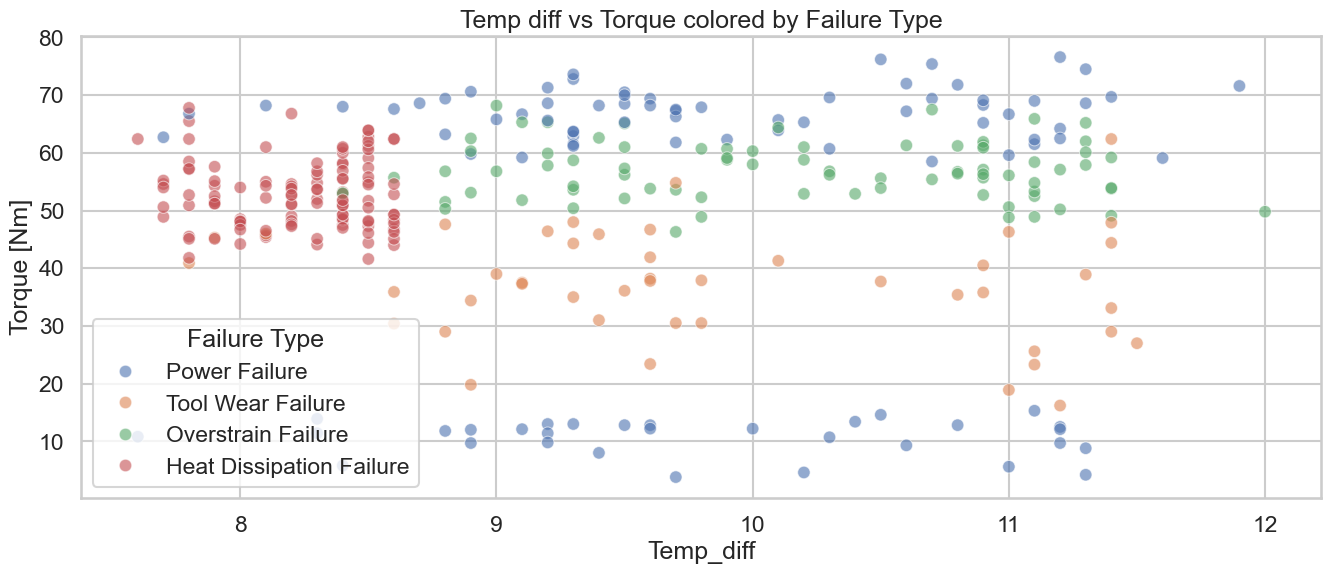

In [21]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Temp_diff', y='Torque [Nm]', hue='Failure Type', data=df2, alpha=0.6)
plt.title('Temp diff vs Torque colored by Failure Type')
plt.show()

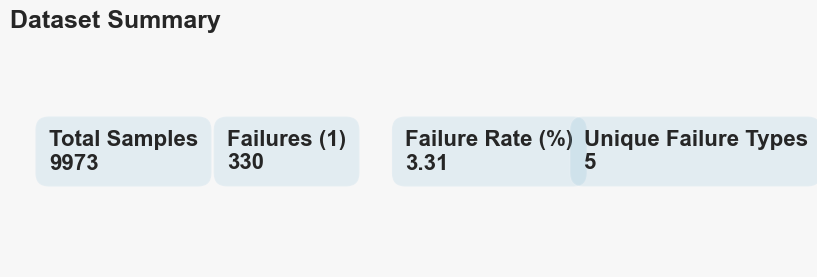

In [ ]:
# Summary cards showing dataset shape, failure rate, failure types
fig, ax = plt.subplots(figsize=(10, 3))
fig.patch.set_facecolor('#f7f7f7')

total_rows = len(df)
failure_rows = df['Target'].sum()
failure_rate = (failure_rows / total_rows) * 100
unique_failures = df['Failure Type'].nunique()

stats = {
    "Total Samples": total_rows,
    "Failures (1)": failure_rows,
    "Failure Rate (%)": f"{failure_rate:.2f}",
    "Unique Failure Types": unique_failures
}

# Draw text cards
for i, (key, val) in enumerate(stats.items()):
    ax.text(0.05 + i*0.23, 0.5, f"{key}\n{val}",
            fontsize=16, fontweight='bold', va='center', ha='left',
            bbox=dict(facecolor='#2b8cbe', alpha=0.1, boxstyle='round,pad=0.6'))
ax.axis('off')
plt.title("Dataset Summary", fontsize=18, fontweight='bold', loc='left')
plt.show()


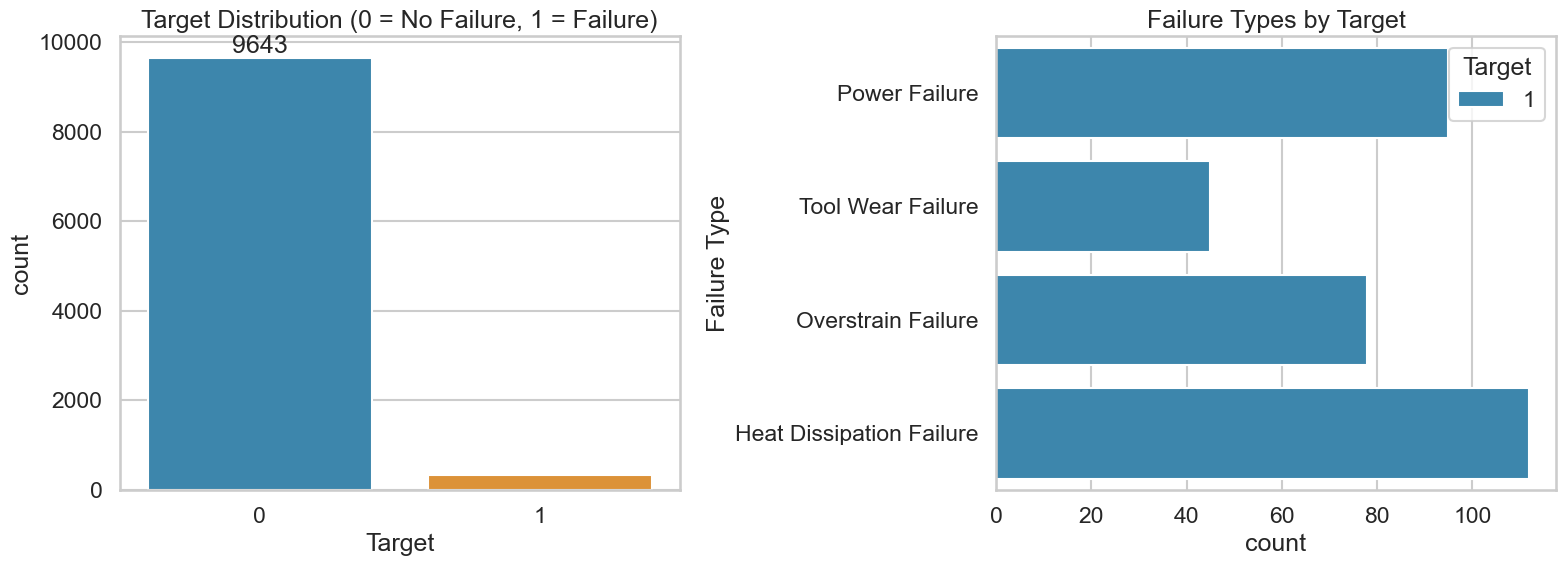

In [ ]:
# Count plots for Target and Failure Type distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Target counts
sns.countplot(x='Target', data=df, ax=axes[0], palette=['#2b8cbe', '#f7941d'])
axes[0].set_title("Target Distribution (0 = No Failure, 1 = Failure)")
axes[0].bar_label(axes[0].containers[0])

# Failure Type counts
sns.countplot(y='Failure Type', data=df2, hue='Target', ax=axes[1], palette=['#2b8cbe', '#f7941d'])
axes[1].set_title("Failure Types by Target")
axes[1].legend(title='Target')

plt.tight_layout()
plt.show()


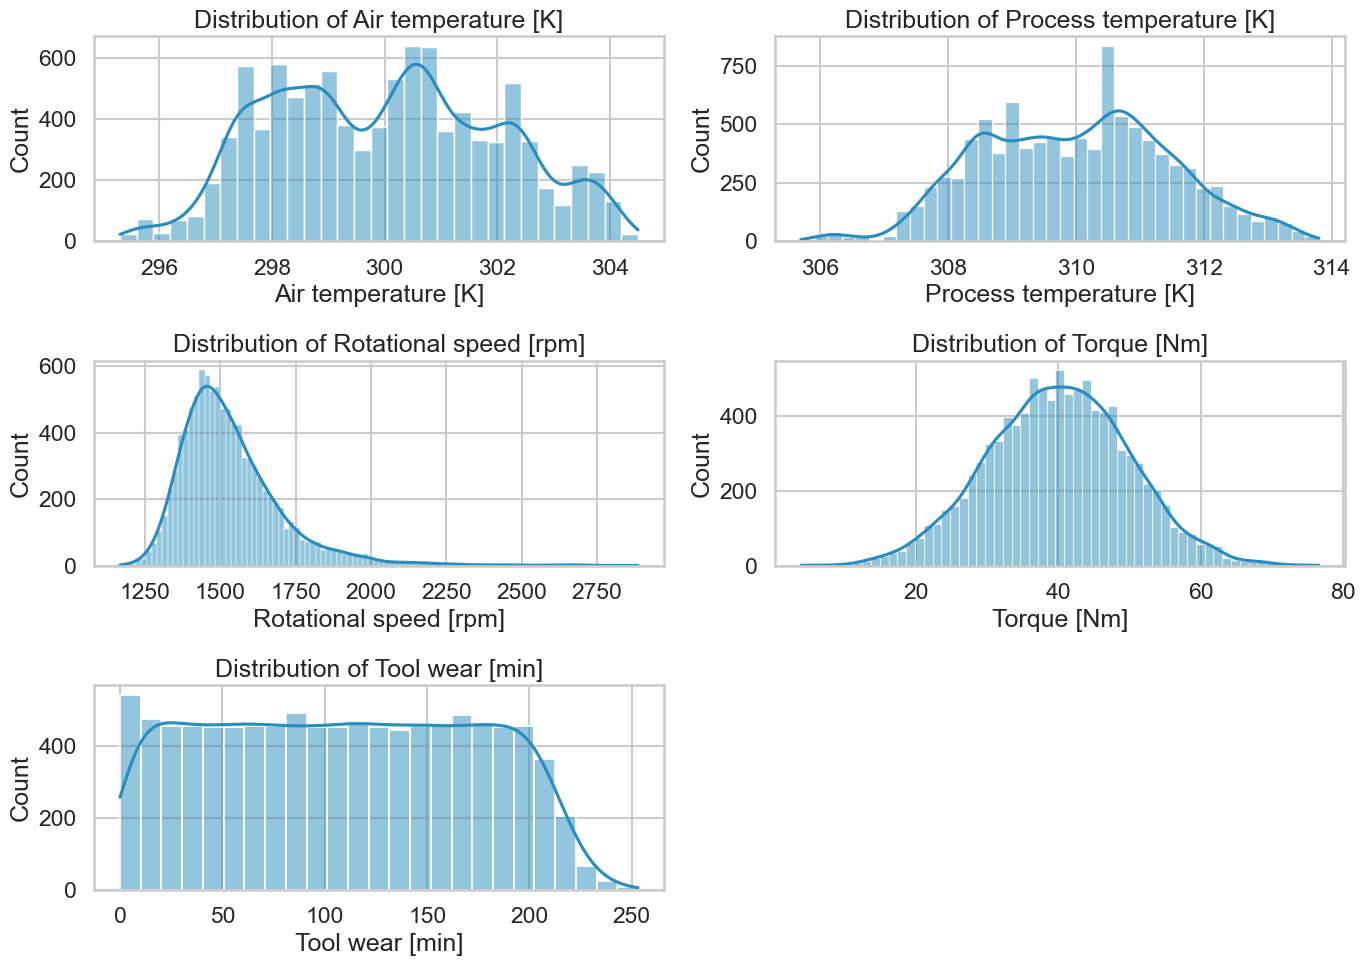

In [ ]:
# Histograms + KDE for key numeric columns
numeric_cols = ['Air temperature [K]', 'Process temperature [K]',
                'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color='#2b8cbe', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide last axis if odd number
axes[-1].axis('off')

plt.tight_layout()
plt.show()


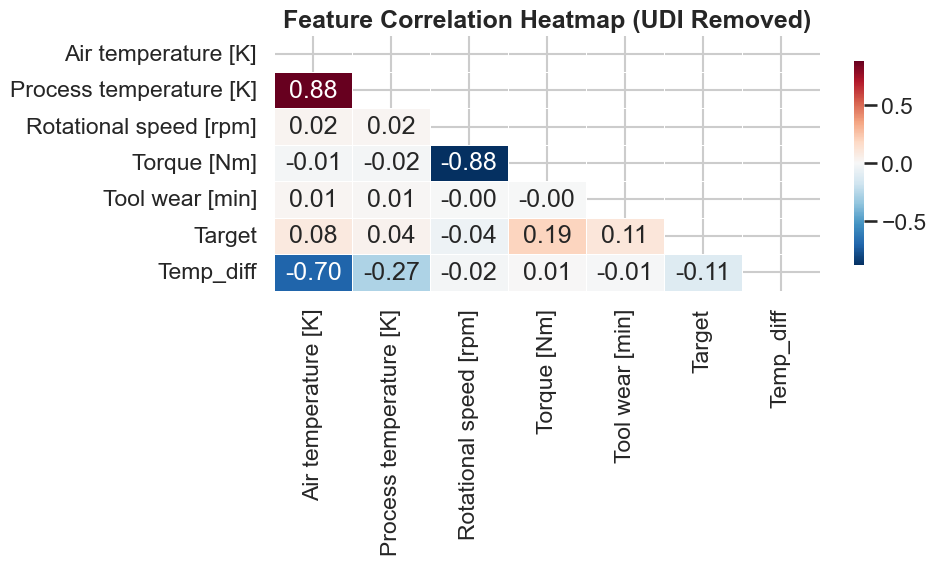

In [ ]:
# Correlation heatmap (numeric features only)
plt.figure(figsize=(10, 6))

# Select numeric columns and drop UDI
corr = df.select_dtypes(include=['number']).drop(columns=['UDI'], errors='ignore').corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='RdBu_r',
    center=0,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title("Feature Correlation Heatmap", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

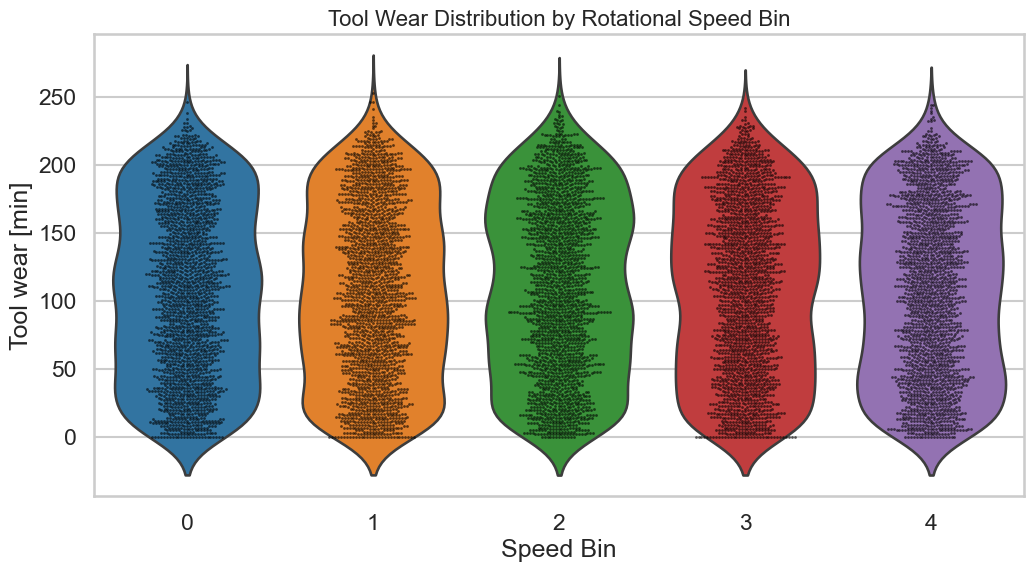

In [ ]:
# Relationship between rotational speed and tool wear
df['Speed Bin'] = pd.qcut(df['Rotational speed [rpm]'], 5, labels=False)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Speed Bin', y='Tool wear [min]', data=df, inner=None, palette='tab10')
sns.swarmplot(x='Speed Bin', y='Tool wear [min]', data=df, color='black', size=2, alpha=0.6)
plt.title("Tool Wear Distribution by Rotational Speed Bin", fontsize=16)
plt.show()
